In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('house.csv')
df.head()

,Unnamed: 0,Area (sq ft),Bedrooms,Bathrooms,Garage Spaces,Age (years),Floors,Lot Size (sq ft),Nearby Schools Rating,Crime Rate (per 1000),Median Income ($1000s),Price ($1000s)
0,0,1660,6,2,0,38,1,7065,3,5.234289,110,1401.044018
1,1,4572,3,3,0,5,2,3179,4,7.703932,115,2256.896640
2,2,3892,5,2,0,23,1,5967,8,1.726550,77,2141.087063
3,3,1266,2,4,0,28,2,1634,4,7.557269,51,941.684355
4,4,4244,4,4,1,34,2,4631,7,7.631866,67,2125.858656


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df.head()

,Area (sq ft),Bedrooms,Bathrooms,Garage Spaces,Age (years),Floors,Lot Size (sq ft),Nearby Schools Rating,Crime Rate (per 1000),Median Income ($1000s),Price ($1000s)
0,1660,6,2,0,38,1,7065,3,5.234289,110,1401.044018
1,4572,3,3,0,5,2,3179,4,7.703932,115,2256.896640
2,3892,5,2,0,23,1,5967,8,1.726550,77,2141.087063
3,1266,2,4,0,28,2,1634,4,7.557269,51,941.684355
4,4244,4,4,1,34,2,4631,7,7.631866,67,2125.858656


In [5]:
df.shape

(2000, 11)

In [6]:
df.isnull().sum()

,0
Area (sq ft),0
Bedrooms,0
Bathrooms,0
Garage Spaces,0
Age (years),0
Floors,0
Lot Size (sq ft),0
Nearby Schools Rating,0
Crime Rate (per 1000),0
Median Income ($1000s),0


In [9]:
df.rename(columns={'Area (sq ft)':'Area(sqft)','Garage Spaces':'Garage_spaces','Lot Size (sq ft)':'Lot_size(sq ft)'
,'Nearby Schools Rating':'Nearby_schools_rating', 'Crime Rate (per 1000)':'Crime_rate',
                   'Median Income ($1000s)':'Median_income', 'Price ($1000s)':'Price'}, inplace=True)

In [10]:
df.columns

Index(['Area(sqft)', 'Bedrooms', 'Bathrooms', 'Garage_spaces', 'Age (years)',
       'Floors', 'Lot_size(sq ft)', 'Nearby_schools_rating', 'Crime_rate',
       'Median_income', 'Price'],
      dtype='object')

In [16]:
X = df[['Area(sqft)', 'Bedrooms', 'Bathrooms', 'Garage_spaces',
        'Floors', 'Lot_size(sq ft)', 'Nearby_schools_rating', 'Crime_rate']]

y = df['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 85.76327123884417
Mean Squared Error: 11197.810245440523
Root Mean Squared Error: 105.81970631900526
R-squared Score: 0.9340798339270504


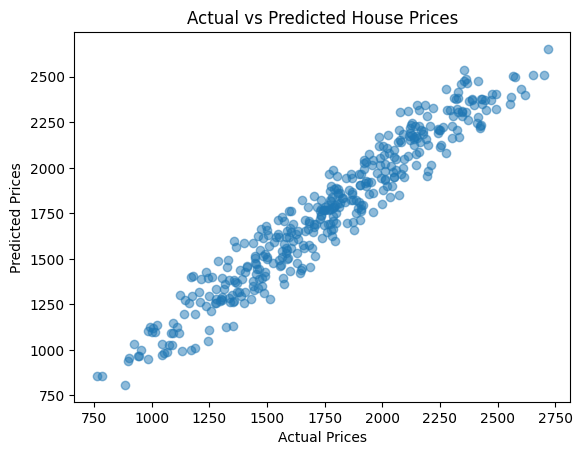

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [25]:
def get_user_input():
    print("\n Enter details to predict house price")

    area = float(input("Enter Area (sqft): "))
    bedrooms = int(input("Enter number of Bedrooms: "))
    bathrooms = int(input("Enter number of Bathrooms: "))
    garage_spaces = int(input("Enter number of Garage Spaces: "))
    floors = int(input("Enter number of Floors: "))
    lot_size = float(input("Enter Lot Size (sqft): "))
    school_rating = float(input("Enter Nearby Schools Rating (1-5): "))
    crime_rate = float(input("Enter Crime Rate (per 1000 people): "))

    return [[area, bedrooms, bathrooms, garage_spaces, floors, lot_size, school_rating, crime_rate]]

In [26]:

# Get user input
user_data = get_user_input()

# Predict house price
predicted_price = model.predict(user_data)

# Display result
print(f"\n Estimated House Price: ${predicted_price[0]:,.2f}")


 Enter details to predict house price
Enter Area (sqft): 500
Enter number of Bedrooms: 2
Enter number of Bathrooms: 2
Enter number of Garage Spaces: 1
Enter number of Floors: 1
Enter Lot Size (sqft): 600
Enter Nearby Schools Rating (1-5): 5
Enter Crime Rate (per 1000 people): 1

 Estimated House Price: $733.20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
